In [4]:
import pandas as pd
from pandas_datareader import data as web # Package and modules for importing data; this code may change depending on pandas version
import datetime
import matplotlib.pyplot as plt   # Import matplotlib
import datetime

data = pd.read_csv('data-1year.csv', index_col=0)

type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,Open,High,Low,Close,Volume
Time (UTC),,,,,
2017.01.01 22:00:00,1.05148,1.05153,1.05148,1.05153,2.25
2017.01.01 22:01:00,1.05153,1.05153,1.05153,1.05153,1.50
2017.01.01 22:02:00,1.05170,1.05175,1.05170,1.05175,9.37
2017.01.01 22:03:00,1.05174,1.05175,1.05174,1.05175,0.74
2017.01.01 22:04:00,1.05175,1.05175,1.05175,1.05175,0.00


Populating the interactive namespace from numpy and matplotlib


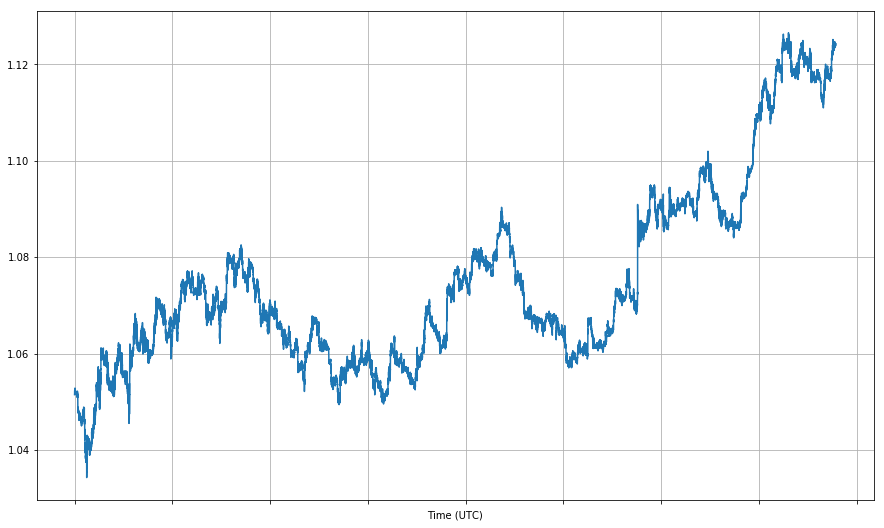

In [6]:
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
data["Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

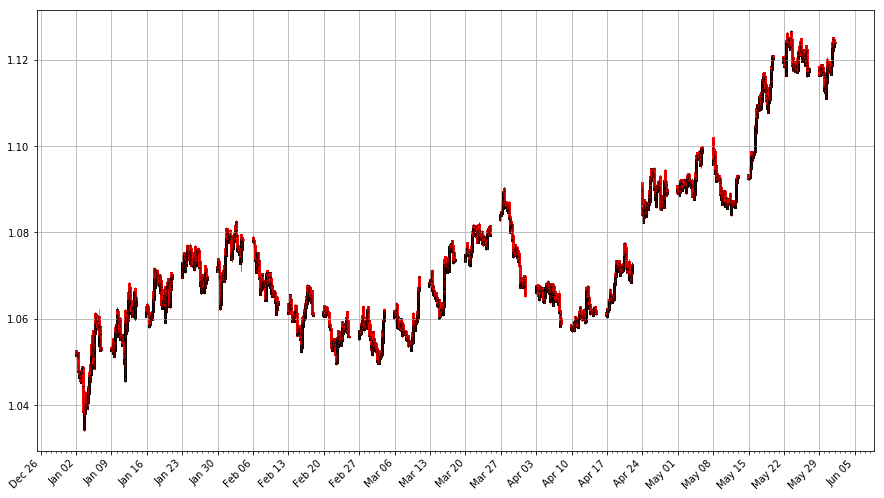

In [11]:
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from mpl_finance import candlestick_ohlc

def date_time(date):
    return (datetime.datetime(int((date).split('.')[0]), int((date).split('.')[1]), int((date).split('.')[2].split(' ')[0])))

def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    
    
#     print((plotdat.index[-1]).split('.'))
#     print(datetime.datetime(int((plotdat.index[-1]).split('.')[0]), int((plotdat.index[-1]).split('.')[1]), int((plotdat.index[-1]).split('.')[2].split(' ')[0]) ))
#     print(datetime.datetime(2018,9,3, 5,30))
#     print(plotdat.index[0])
#     print(pd.Timedelta('730 days'))
    
    if date_time(plotdat.index[-1]) - date_time(plotdat.index[0]) < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
#     print(pd.Timestamp(plotdat.index[0]))
#     print((plotdat.index[0]))
    
#     print( [pd.Timestamp(i) for i in plotdat.index] )
    
    candlestick_ohlc(ax, list(zip(list(date2num([pd.Timestamp(i) for i in plotdat.index])), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(data)